#Tarea 2

In [1]:
using PyPlot;

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = -0.123 + 0.745im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [2]:
"""Funcion que crea una malla cuadrada de condiciones iniciales en el plano comlejo  con tres
parametros de entrada:

m= numero de puntos en los que se quiere dividir el intervalo real y el intervalo imaginario 
(en total se tendran m^2 condiciones iniciales)
Real= intervalo en el eje real en donde se construye la malla; se debe dar en forma de arreglo
Imag= intervalo en el eje imaginario en donde se construye la malla; se debe dar en forma de 
arreglo
"""
function malla{T<:Float64}(m::Int,Real::Array{T,1},Imag::Array{T,1})
    Re=collect(linspace(Real[1],Real[end],m))
    Im=collect(linspace(Imag[1],Imag[end],m))
    malla=zeros(Complex,m,m)
    for i in 1:m
        for j in 1:m
            malla[j,i]=Re[i]+Im[end-j+1]im
        end 
    end
    return malla
end 

malla (generic function with 1 method)

In [3]:
c=-0.123 + 0.745im 
f(z)=z^2+c

f (generic function with 1 method)

In [4]:
m=500
init_cond=malla(m,[-1.,1.],[-1.,1.]);

In [5]:
#initial_cond=reshape(malla,m*m,1)
N=200#numero de iteraciones
Z=zeros(Complex,m,m)
for i in 1:m
    for j in 1:m
        Z[j,i]=init_cond[j,i]
        for k in 1:N
            Z[j,i]=f(Z[j,i])
        end
    end 
end

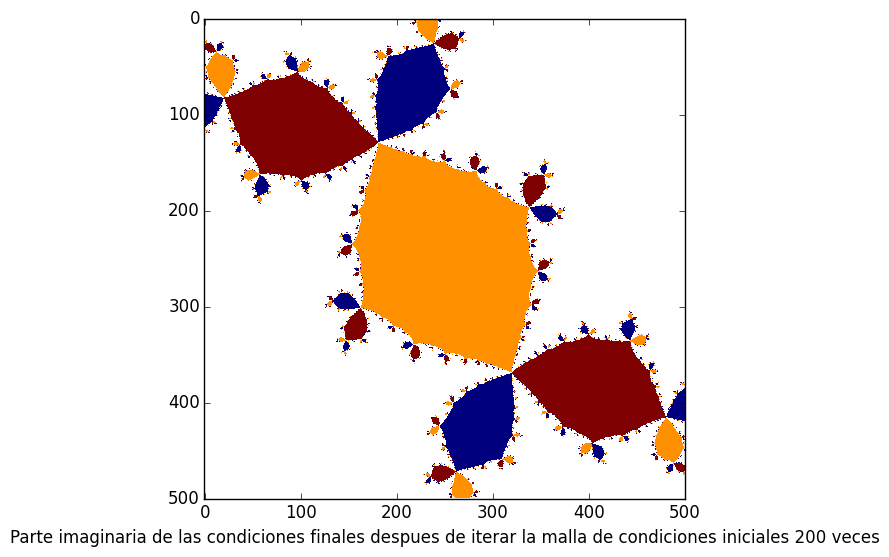

In [6]:
imshow(imag(Z),interpolation="nearest")
xlabel("Parte imaginaria de las condiciones finales despues de iterar la malla de condiciones iniciales $N veces " );

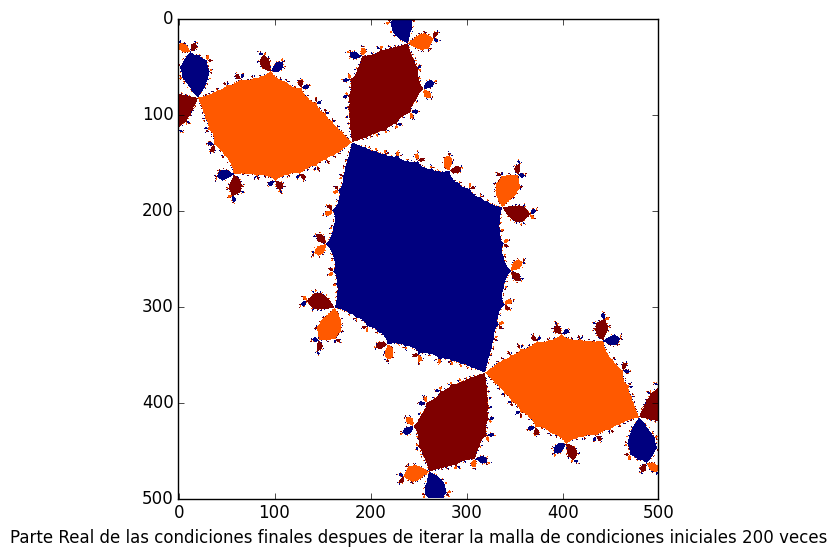

In [7]:
imshow(real(Z),interpolation="nearest")
xlabel("Parte Real de las condiciones finales despues de iterar la malla de condiciones iniciales $N veces " );

En las dos figuras anteriores, se observa que la malla de condiciones iniciales converge a tres valores distintos indicados por los tres colores diferentes que se aprecian en los mapas de color (el color blanco representa todos los puntos que divergen después de un número finito de iteraciones). Todo esto esta relacionado con los conjuntos de Fatou y los conjuntos de Julia. 

#Contando el número de iteraciones en que tarda en diverger

Una pregunta que se puede hacer observando las figuras anteriores es que tan rápido divergen las condiciones iniciales, o cuánto tardan en converger.
Las siguientes líneas de código crean conjuntos de Julia (y de Fatou) con este concepto. Se cuenta cuantas iteraciones se necesitan para darnos cuenta de que una condicion inicial diverja. Se utiliza un círculo en el radio complejo de algun radio que se desee  y se cuenta cuantas iteraciones se tarda una condición inicial en salirse de ese circulo bajo la aplización recursiva del sistema dinámico $z_{n+1}=z_n^2+c$. Si las condiciones inicailes convergen a un valor entonces nunca se saldrán del algun circulo cuyo radio sea mayor o igual que el valor absoluto del número complejo al que convergen, por lo que en el código se emplea un número máximo de iteraciones. 

La idea se detalla en los artículos de la revista "Linux Voice" ediciones de Diciembre de 2014 y Enero de 2015 y se pueden encontrar en las siguientes ligas, respectivamente:

https://www.linuxvoice.com/issues/009/fractal.pdf

https://www.linuxvoice.com/issues/010/julia.pdf

In [8]:
N=80#numero  MAXIMO de iteraciones
Z=zeros(Complex,m,m)
iterandos=zeros(m,m) #matriz en donde se guardan la cantidad de iteraciones de cada condicion 
#inicial
for i in 1:m
    for j in 1:m
        Z[j,i]=init_cond[j,i]
        for k in 1:N
            Z[j,i]=f(Z[j,i])
            iterandos[j,i]=k
            if 
                abs(Z[j,i])>=4 #Radio del circulo que se desa imponer como criterio de 
                #divergencia
                break
            end 
           
        end
    end 
end

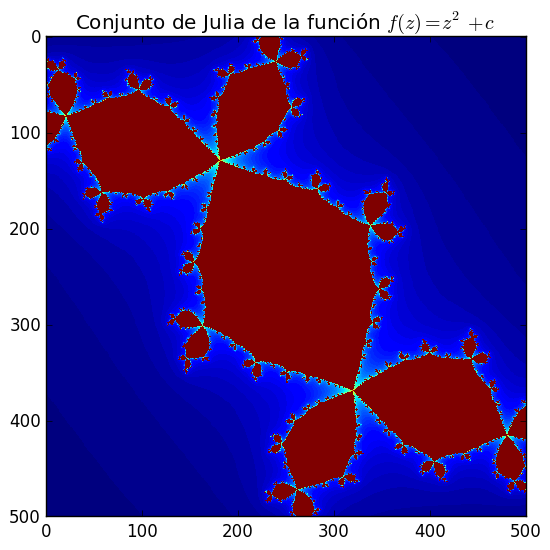

In [9]:
imshow(iterandos,interpolation="nearest");
title(L"Conjunto de Julia de la función $f(z)=z^2+c$");

Una desventaja de hacerlo de esta manera es que no podemos ver a cuantos valores distintos convergen las condiciones iniciales a diferencia del método anterior en donde veíamos diferentes colores para los 3 valores a los que convergían la parte real  y la parte imaginaria de las condiciones después de $n$ iteraciones.

A continuación ponemos esta manera de generar conjuntos de Julia en una funcion para poder "vender muchas playeras" creadas a partir de distintas funciones complejas

In [10]:
"""Funcion que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set(f,init_conditions,maxiter,R)
    
    m=size(init_cond)[1]
    Z=zeros(Complex,m,m)
    iterandos=zeros(m,m) 
    for i in 1:m
        for j in 1:m
            Z[j,i]=init_conditions[j,i]
                for k in 1:maxiter
                Z[j,i]=f(Z[j,i])
                iterandos[j,i]=k
                    if 
                    abs(Z[j,i])>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end 

Julia_set (generic function with 1 method)

Las siguientes figuras se generaron cambiando el valor de $c$ como especifican los títulos y los pies de figuras siguientes. También se reproducieron algunas de las giuras mostradas en lapágina de conjuntos de Julia de Wikipedia a partir de la función `Julia_set` escrita anteriormente. Se tomó la misma malla de condiciones iniciales en el producto cartesiano $[-1,1]\times [-1,1]$ con $1000^2$ puntos en total.

In [11]:
m=1000
init_cond=malla(m,[-1,1.],[-1,1.]);

In [12]:
c=0.12256484161600012 - 0.74486407104im
g(z)=z^2+c
iterandosg=Julia_set(g,init_cond,80,4);

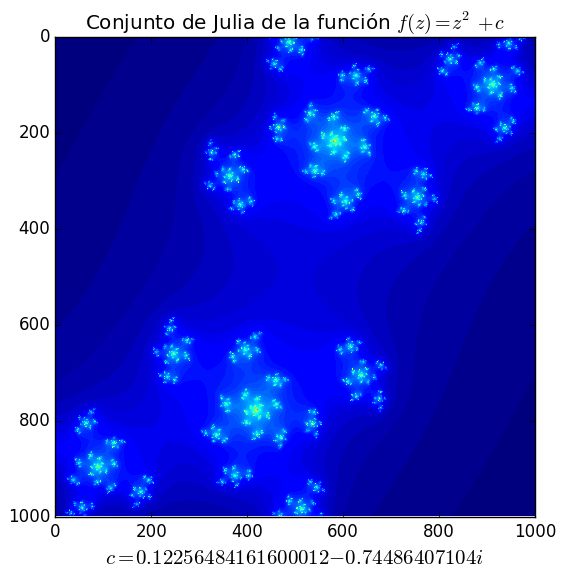

In [13]:
imshow(iterandosg,interpolation="nearest")
title(L"Conjunto de Julia de la función $f(z)=z^2+c$")
xlabel(L"c=0.12256484161600012 - 0.74486407104i",size=15);

In [14]:
c=0.4
h(z)=z^2+c
h_iter=Julia_set(h,init_cond,100,10);

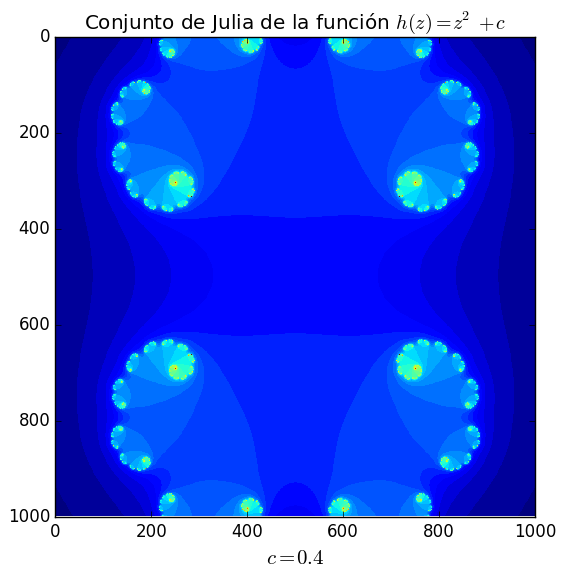

In [15]:
imshow(h_iter,interpolation="nearest")
title(L"Conjunto de Julia de la función $h(z)=z^2+c$")
xlabel(L"c=0.4",size=15);

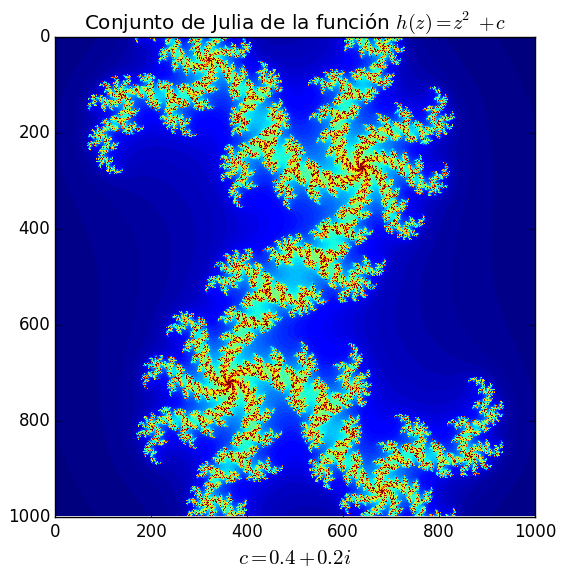

In [16]:
c=0.4+0.2im
hh(z)=z^2+c
h_iter=Julia_set(hh,init_cond,100,10);
imshow(h_iter,interpolation="nearest")
title(L"Conjunto de Julia de la función $h(z)=z^2+c$")
xlabel(L"c=0.4+0.2i",size=15);

Haciendo un pequeño zoom a esta figura en el primer cuadrante del plano complejo $[0,0.5]\times [0,0.5]$

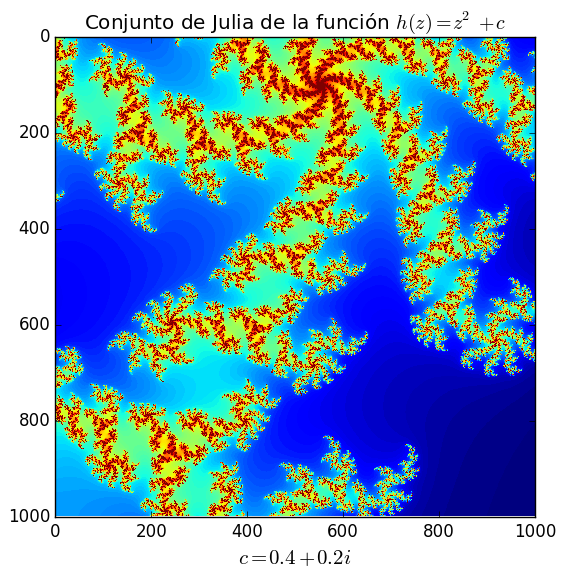

In [17]:
zoom=malla(1000,[0,0.5],[0,0.5]) #malla nueva en el primer cuadrante
zoomh=Julia_set(hh,zoom,100,10)
imshow(zoomh,interpolation="nearest")
title(L"Conjunto de Julia de la función $h(z)=z^2+c$")
xlabel(L"c=0.4+0.2i",size=15);

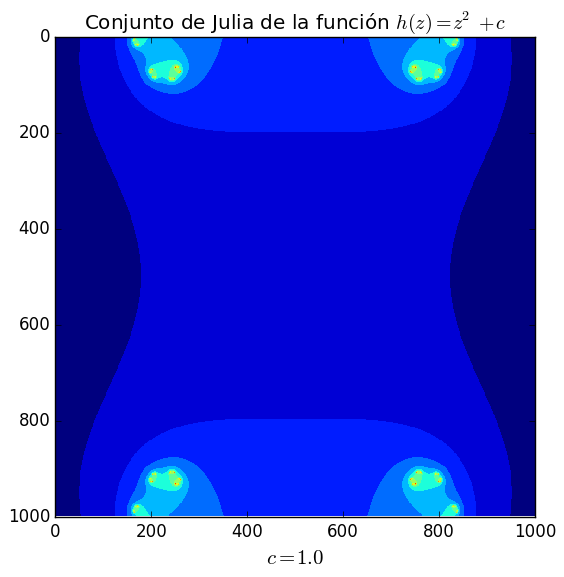

In [18]:
c=1.0
hh(z)=z^2+c
h_iter=Julia_set(hh,init_cond,100,10);
imshow(h_iter,interpolation="nearest")
title(L"Conjunto de Julia de la función $h(z)=z^2+c$")
xlabel(L"c=1.0",size=15);

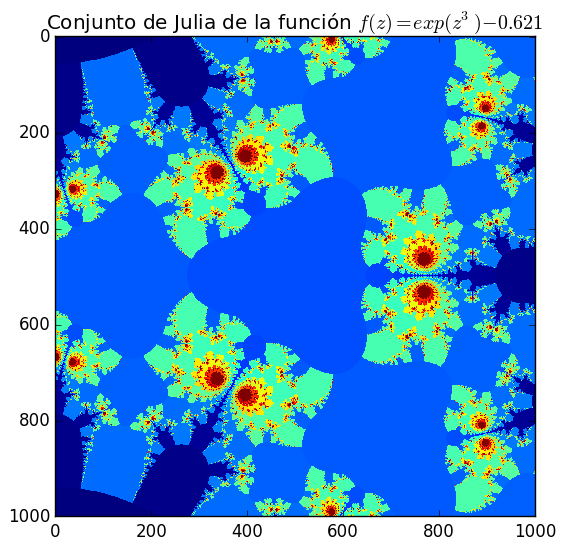

In [19]:
 G(z)=exp(z^3)-0.621
G_iter=Julia_set(G,init_cond,100,4);
imshow(G_iter,interpolation="nearest")
title(L"Conjunto de Julia de la función $f(z)=exp(z^3)-0.621$ ")
#xlabel(L"c=1.0",size=15);

In [20]:
GG(z)=z*exp(z)+0.04
init_cond=malla(1000,[-1,1.0],[-1,1.0]);

In [21]:
GG_iter=Julia_set(GG,init_cond,60,100);

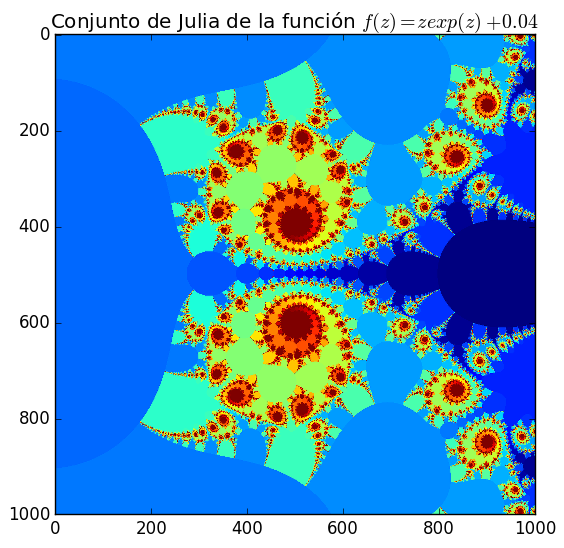

In [32]:
imshow(GG_iter,interpolation="lanczos")
title(L"Conjunto de Julia de la función $f(z)=zexp(z)+0.04$ ");

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{x_n}) = 2x_n \mod 1.
\end{equation}

- Obtengan los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{x_n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

In [23]:
"""dyn_sys(x) es la función que representa la operación x mod(1) pero ésta función solo 
esta definida en el dominio correspondiente al intervalo (0,1).Esta definida con la 
siguiente regla de correspondencia:

1) dyn_sys(x)=2x, si x ∈(0,0.5)
ó
2) dyn_sys(x)=2x-1, si x∈[0.5,1)

"""
function dyn_sys(x)
    if 0<=x<0.5
        ds=2*x
    elseif 0.50<=x<=1
        ds=2*x-1
    else
        println("Domain error ")
    end 
    return ds
end 

dyn_sys (generic function with 1 method)

In [24]:
incond=0.35  #condicion inicial
m=100 #numero de iteraciones
x=zeros(m)
x[1]=dyn_sys(incond)
for i in 1:m-1
    x[i+1]=dyn_sys(x[i])
end 


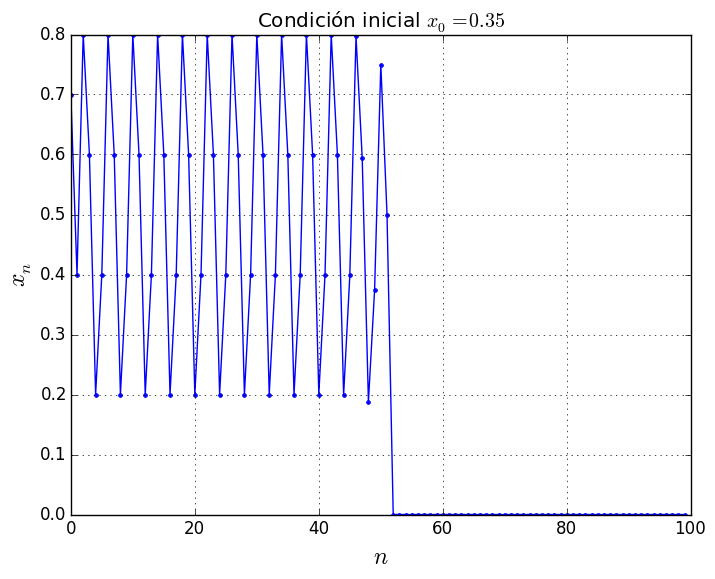

In [25]:
plot(x,"b.-");
ylabel(L"x_{n}",size=17)
xlabel(L"n",size=17)
title(L"Condición inicial $x_0=0.35$")
grid("on");

In [26]:
n=10 #numero de condiciones iniciales
initial_cond=linspace(0,1,n)  #condiciones iniciales
m=100#numero de iteraciones
x=zeros(m,n)
for j in 1:n
    x[1,j]=dyn_sys(initial_cond[j])
    for i in 1:m-1
        x[i+1,j]=dyn_sys(x[i,j])
    end 
end 


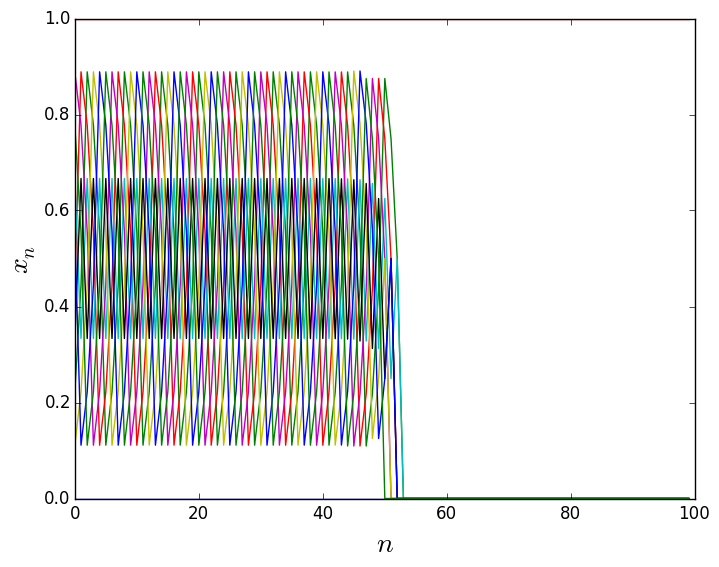

In [27]:
for i in 1:n
    plot(x[:,i])
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

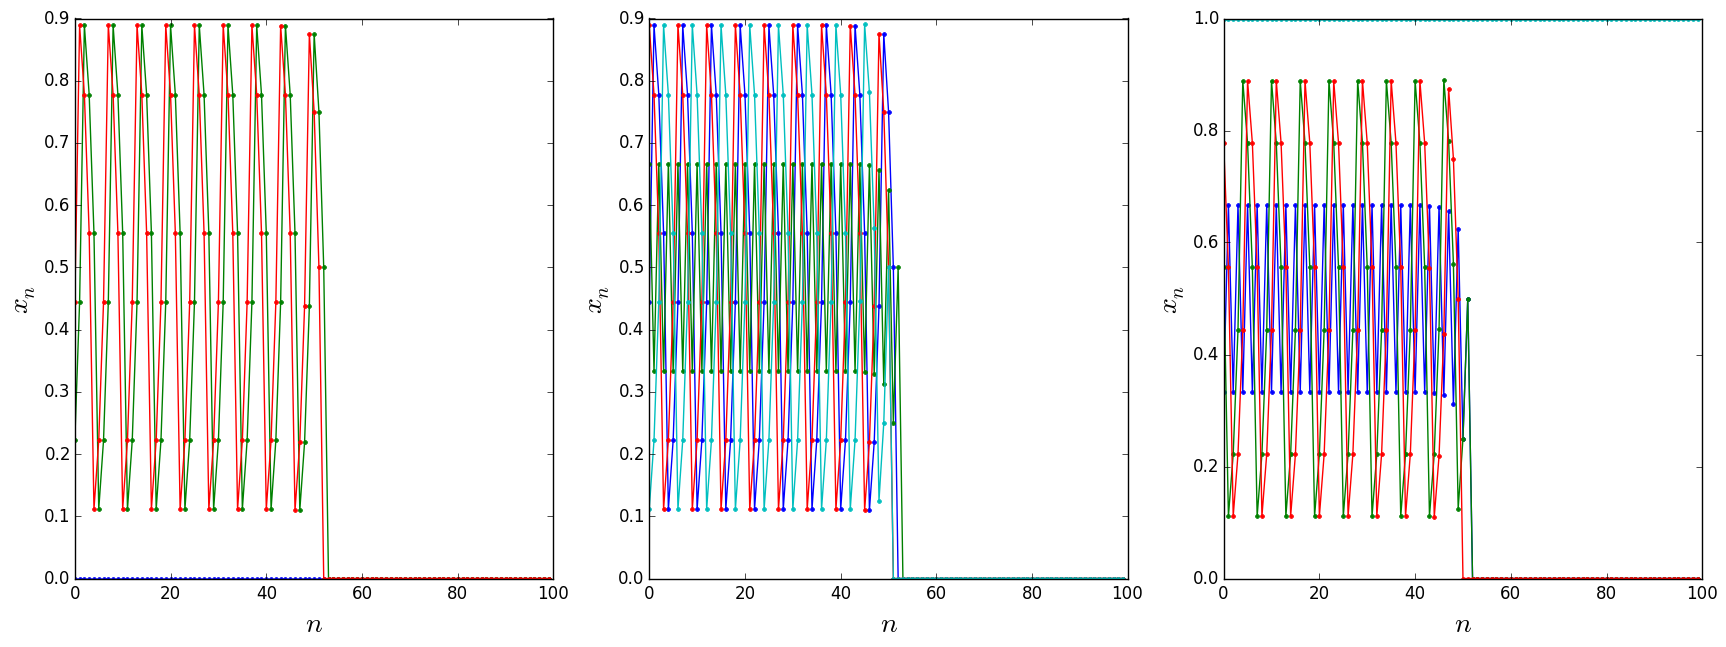

In [28]:
figure("pyplot_subplot_mixed",figsize=(21,7))
subplot(131)
for i in 1:3
    plot(x[:,i],".-")
end
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);


subplot(132)
for i in 3:6
    plot(x[:,i],".-")
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

subplot(133)
for i in 7:10
    plot(x[:,i],".-")
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

Observemos que ninguna condicion inicial es un punto fijo salvo el 0:

In [29]:
incond=0.  #condicion inicial
m=100 #numero de iteraciones
x=zeros(m)
x[1]=dyn_sys(incond)
for i in 1:m-1
    x[i+1]=dyn_sys(x[i])
end 


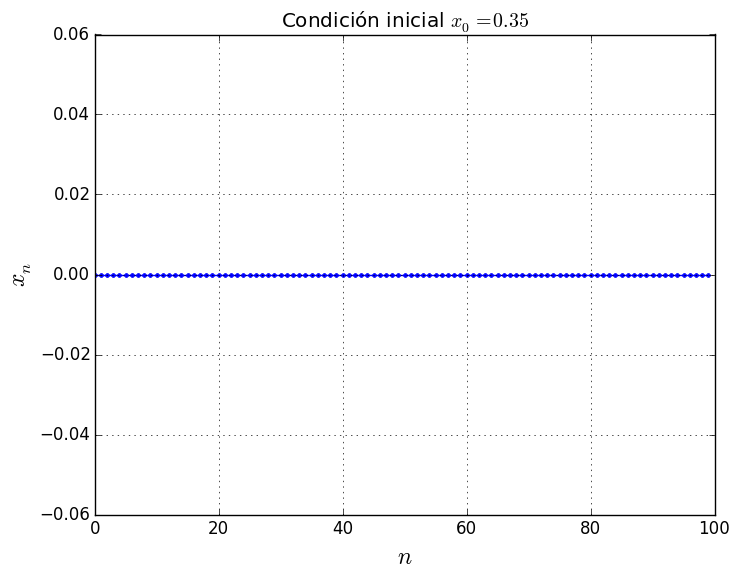

In [30]:
plot(x,"b.-");
ylabel(L"x_{n}",size=17)
xlabel(L"n",size=17)
title(L"Condición inicial $x_0=0.35$")
grid("on");

Algunos comentarios que se pueden hacer de este sistema dinámico es que todos las condiciones iniciales son órbitas de periodo dos como se puede apreciar en las figuras anteriores y solo el 0 es un punto fijo de esta función. 

Por otro lado, pareciera que todos los puntos convergen al punto fijo después de un número alto de iteraciones y pensaríamos que el 0 es un atractor medio extraño  por que de repente conforme se itera el mapeo, este punto fijo "saca" a los estados de las órbitas periódicas, cosa que en principio no debería pasar pues en ese caso no serían orbitas periódicas. 
Lo que en realidad está pasando es que numéricamente, en la represntación binaria de la computadora se esta haciendo lo siguiente:

Todo numero entre 0 y uno se escribe en su representación binaria de la forma:

In [31]:
bits(0.1)

"0011111110111001100110011001100110011001100110011001100110011010"

Luego estamos multiplicando a $0.1$ por 2 en modulo 1. Pero recordemos que al tener una representación binaria si multimplicamos por 2, lo que estamos haciendo es "recorrer a la derecha" el punto decimal. Pensemos en base 10:

$13.232\times10=132.32  \Rightarrow  132.32\times10 =1323.2$ 
etc.

Entonces en base dos, trabajando con Floats de 64 bits al iterar alrededor de 60 veces todos los números quedan del lado izquierdo del punto decimal y los bits correspondientes a la parte decimal se vuelve cero. Como estamos tomando modulo 1 entonces nos quedamos ahora con esta parte decimal que ahora es cero y por tanto pareciera que el sistema dinámico colapasa a cero; esto sucede entonces, debido a la representación de 64 bits de la computadora y es algo externo a la naturaleza del sistema dinámico.

En realidad todas las condiciones iniciales en el intervalo (0,1) generan orbitas periódicas de periodo 2.
